In [24]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# tensorlow练习

In [13]:
a = tf.constant([1.0, 2.0, 3.0], name="input1")
b = tf.Variable(tf.random_uniform([3]), name="input2")
c = tf.Variable(tf.random_uniform([3]), name="input3")
add = tf.add_n([a, b,c], name="addOP")
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
#     writer = tf.summary.FileWriter("D:/tensorboardDemon", sess.graph)
    print(sess.run(add))
    print(sess.run(c))
# writer.close()


[ 2.03992414  3.48601818  3.43219066]
[ 0.14256847  0.53394878  0.02727818]


# 使用逻辑回归来识别

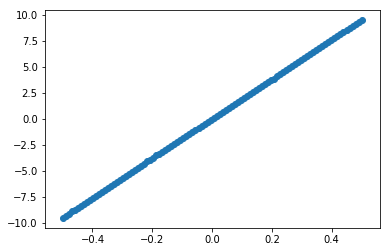

In [92]:
x_data = np.linspace(-0.5, 0.5, 100)[:,np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.dot(x_data, 19) + noise

# x_data = tf.random_normal([100, 1])
# y_data = tf.multiply(x_data, 7) + 3

# 建立输入层
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([1, 100]))
b1 = tf.Variable(tf.zeros([1, 100]))

# 定义激活函数
wx_plus_b1 = tf.matmul(x, w1) + b1
l1 = tf.nn.tanh(wx_plus_b1)


# w2 = tf.Variable(tf.random_normal([100, 100]))
# b2 = tf.Variable(tf.zeros([100, 1]))

# # 定义激活函数

# wx_plus_b2 = tf.matmul(l1, w2) + b2
# l2 = tf.nn.sigmoid(wx_plus_b2)


# 创建输出层
w3 = tf.Variable(tf.random_normal([100, 1]))
b3 = tf.Variable(tf.zeros([1, 1]))

# 定义激活函数
wx_plus_b3 = tf.matmul(l1, w3) + b3
pridicter = tf.nn.tanh(wx_plus_b3)

# 定义损失函数
loss = tf.reduce_mean(tf.square(y - wx_plus_b3))
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     x_data = sess.run(x_data)
#     y_data = sess.run(y_data)
    for _ in range(200):
        sess.run(train, feed_dict={x:x_data, y:y_data})
        
    predict_y=sess.run(wx_plus_b3, feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,predict_y,'r',lw=8)
    plt.show()
    


# 使用CNN来实现识别

In [94]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [102]:
batch_size = 50
# x 是特征值
x = tf.placeholder(tf.float32, [None, 784])
# y 是输出
y = tf.placeholder(tf.float32, [None, 10])

# 模型权重
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# 用softmax 构建逻辑回归模型
pred = tf.nn.softmax(tf.matmul(x, W) + b) 

# loss 函数
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), 1))

# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(25):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += sess.run(cost, feed_dict={x:batch_xs, y:batch_ys}) / total_batch
        if step % 5 == 0:
            print("Epoch: {}, cost = {:.9f} ".format(step, avg_cost))

    print("运行结束")
    
    correct = tf.equal(tf.arg_max(pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    print("正确率：", accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))


Epoch: 0, cost = 0.427517627 
Epoch: 5, cost = 0.265660014 
Epoch: 10, cost = 0.252292663 
Epoch: 15, cost = 0.245403175 
Epoch: 20, cost = 0.240933270 
运行结束
正确率： 0.923


In [104]:
batch_size = 128
test_size = 256

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def model(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden):
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,                       # l1a shape=(?, 28, 28, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l1 = tf.nn.max_pool(l1a, ksize=[1, 2, 2, 1],              # l1 shape=(?, 14, 14, 32)
                        strides=[1, 2, 2, 1], padding='SAME')
    l1 = tf.nn.dropout(l1, p_keep_conv)

    l2a = tf.nn.relu(tf.nn.conv2d(l1, w2,                     # l2a shape=(?, 14, 14, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l2 = tf.nn.max_pool(l2a, ksize=[1, 2, 2, 1],              # l2 shape=(?, 7, 7, 64)
                        strides=[1, 2, 2, 1], padding='SAME')
    l2 = tf.nn.dropout(l2, p_keep_conv)

    l3a = tf.nn.relu(tf.nn.conv2d(l2, w3,                     # l3a shape=(?, 7, 7, 128)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l3 = tf.nn.max_pool(l3a, ksize=[1, 2, 2, 1],              # l3 shape=(?, 4, 4, 128)
                        strides=[1, 2, 2, 1], padding='SAME')
    l3 = tf.reshape(l3, [-1, w4.get_shape().as_list()[0]])    # reshape to (?, 2048)
    l3 = tf.nn.dropout(l3, p_keep_conv)

    l4 = tf.nn.relu(tf.matmul(l3, w4))
    l4 = tf.nn.dropout(l4, p_keep_hidden)

    pyx = tf.matmul(l4, w_o)
    return pyx

trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
trX = trX.reshape(-1, 28, 28, 1)  # 28x28x1 input img
teX = teX.reshape(-1, 28, 28, 1)  # 28x28x1 input img


X = tf.placeholder("float", [None, 28, 28, 1])
Y = tf.placeholder("float", [None, 10])

w = init_weights([3, 3, 1, 32])       # 3x3x1 conv, 32 outputs
w2 = init_weights([3, 3, 32, 64])     # 3x3x32 conv, 64 outputs
w3 = init_weights([3, 3, 64, 128])    # 3x3x32 conv, 128 outputs
w4 = init_weights([128 * 4 * 4, 625]) # FC 128 * 4 * 4 inputs, 625 outputs
w_o = init_weights([625, 10])         # FC 625 inputs, 10 outputs (labels)

p_keep_conv = tf.placeholder("float")
p_keep_hidden = tf.placeholder("float")
py_x = model(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y))
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_op = tf.argmax(py_x, 1)

# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    sess.run(tf.global_variables_initializer())

    for i in range(10):
        training_batch = zip(range(0, len(trX), batch_size), range(batch_size, len(trX)+1, batch_size))
        for start, end in training_batch:
            sess.run(train_op, feed_dict={X: trX[start:end], 
                                          Y: trY[start:end],
                                          p_keep_conv: 0.8, 
                                          p_keep_hidden: 0.5,
                                         })

        test_indices = np.arange(len(teX)) # Get A Test Batch
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:test_size]
        predicter = sess.run(predict_op, feed_dict={X: teX[test_indices],
                                                    Y: teY[test_indices],
                                                    p_keep_conv: 1.0,
                                                    p_keep_hidden: 1.0})
        print(i, np.mean(np.argmax(teY[test_indices], axis=1) == predicter))
                         

0 0.953125
1 0.98046875
2 0.984375
3 0.98828125
4 0.99609375
5 0.98828125
6 0.98828125
7 0.99609375
8 0.98046875
9 0.9921875
